In [25]:
import numpy as np
import  matplotlib.pyplot as plt
import scipy.special as sp

In [26]:
def source(no_of_users,no_of_bits):
    return np.random.randint(0, 2, (no_of_users,no_of_bits))
no_of_users=2
no_of_bits=8000
msg_bits1=source(no_of_users,no_of_bits)

print("msg\n",msg_bits1)

msg
 [[0 1 0 ... 0 0 0]
 [1 0 1 ... 1 1 1]]


In [27]:
def mod(bits):
    #mapping
    return 2*bits-1

symbols=mod(msg_bits1)
print(symbols)

[[-1  1 -1 ... -1 -1 -1]
 [ 1 -1  1 ...  1  1  1]]


In [28]:
def awgn(symbols, snr_db):

    combined_symbols=np.sum(symbols,axis=0)
    # print(combined_symbols)
    signal_power = np.mean(combined_symbols**2)

    snr_linear = 10**(snr_db / 10.0)
    noise_variance =  signal_power / (2 * snr_linear)

    noise = np.sqrt(noise_variance) * (np.random.randn(len(combined_symbols)))

    
    return combined_symbols + noise

snr_db=np.arange(0,1,1)
received_signal=awgn(symbols,snr_db)
print(received_signal)

[-0.83655235  1.49758419 -2.83566344 ... -0.50062063  0.14538928
 -0.04599462]


In [29]:
def demod(received_signal):
    symbols = {
        2:2,
        0:0,
        -2:-2
    }

    #demodulation
    demodulated_bits=np.array([])
    for i in received_signal:
        closest_symbol = min(symbols.keys(), key=lambda s: np.abs(i - s))
        demodulated_bits=np.append(demodulated_bits,(symbols[closest_symbol]))
    received_signal1=np.array([int(i)  for i in demodulated_bits])

    return received_signal1
demod_symbols=demod(received_signal)
print(demod_symbols)

[ 0  2 -2 ...  0  0  0]


In [30]:
def calculate_ber(msg,rec,no_of_users,no_of_bits):
    sym1=mod(msg)
    combined_symbols=np.sum(symbols,axis=0)
    
    
    # print(msg)
    # msg_sum=np.sum(msg,axis=0)
    # print("\n",msg_sum)
    # print("\n",rec)

    ber=np.mean(combined_symbols!=rec)
    return ber 
BER=calculate_ber(msg_bits1,demod_symbols,no_of_users,no_of_bits)
print(BER)

0.241


In [31]:
def simulate(snr_db_range, msg_bits,no_of_users,no_of_bits):
    ber = []
    # print("msg\n",msg_bits)

    for snr_db in snr_db_range:
        # print("snr=",snr_db)
        # Modulation        symbols-->bitsy])
        transmitted_symbols =mod(msg_bits)
        # print("TX\n",transmitted_symbols)
        
        
        #channel output = bits+noie
        received_symbols = awgn(transmitted_symbols,snr_db)
        # print("sum(x)+n\n",received_symbols)
        
        # Demodulate the received signal        noisy_bits-->symbols
        demodulated_symbols =demod(received_symbols)
        # print("demod\n",demodulated_symbols)
    
        # Calculate BER
        ber.append(calculate_ber(msg_bits, demodulated_symbols,no_of_users,no_of_bits))
        # print(ber)
        # print("\n\n")

    return ber

snr_db_range=np.arange(0,12,1)
ser_bpsk_sum=simulate(snr_db_range,msg_bits1,no_of_users,no_of_bits)
print(ser_bpsk_sum)

[0.242875, 0.202625, 0.15625, 0.117625, 0.084625, 0.058, 0.03475, 0.019, 0.00975, 0.0035, 0.0015, 0.0005]


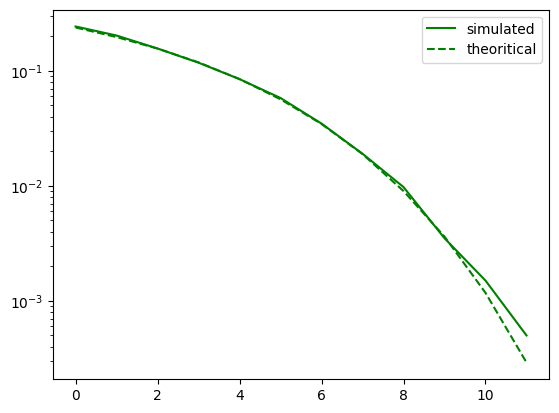

In [32]:
snr_lin=10**(snr_db_range/10)
ser_bpsk_sum_theory=0.75*sp.erfc(np.sqrt(snr_lin/2))
plt.semilogy(snr_db_range,ser_bpsk_sum,  linestyle='-', color="g", label='simulated')
plt.semilogy(snr_db_range, ser_bpsk_sum_theory,  linestyle='--', color='g', label='theoritical')
plt.legend()
plt.show()